### Imports

In [12]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import f_classif, f_regression, mutual_info_classif, RFE, RFECV, SelectFromModel
from sklearn.model_selection import cross_val_score, cross_validate, KFold, StratifiedKFold, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Question 1
## Part 1.0. Data Prep

### 1.0 Define Functions for Data Exploration

In [13]:
# Source: https://stackoverflow.com/questions/29276301/max-and-min-value-for-each-colum-of-one-dataframe
def minMax(x):
    '''
    Determine the min and max range for each 
    feature to see data should be scaled.
    
    Args:
        x: features
    
    Returns:
        Series containing min and max for each feature.
    '''
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

### 1.0. Data Exploration

In [14]:
PATH_TO_Q1_DATA = 'data/HW2_Q1_DATA.csv'
df = pd.read_csv(PATH_TO_Q1_DATA)
pd.set_option('display.max_columns', None)  # show all columns with head()
df.head()

,4E-BP1,ADA,AREG,AXIN1,BACH1,BIRC2,BTN3A2,CASP-8,CCL11,CCL19,CCL20,CCL23,CCL25,CCL28,CCL3,CCL4,CD244,CD28,CD40,CD5,CD6,CD83,CD8A,CDCP1,CDSN,CKAP4,CLEC4A,CLEC4C,CLEC4D,CLEC4G,CLEC7A,CNTNAP2,CSF-1,CST5,CX3CL1,CXADR,CXCL1,CXCL10,CXCL11,CXCL5,CXCL6,CXCL9,DCBLD2,DCTN1,DFFA,DNER,DPP10,EDAR,EIF4G1,EIF5A,EN-RAGE,FAM3B,FCRL6,FGF-19,FGF-21,Flt3L,GLB1,HCLS1,HEXIM1,HGF,HNMT,HSD11B1,IFN-gamma,IFNLR1,IL-10RA,IL-10RB,IL-12B,IL-17A,IL-17C,IL-18R1,IL-20RA,IL18,IL5,IL6,IL7,IL8,IRAK1,ITGA11,ITGA6,ITGB6,ITM2A,JUN,KLRD1,KRT19,LAG3,LAMP3,LAP TGF-beta-1,LIF-R,LILRB4,LY75,MASP1,MCP-1,MCP-2,MCP-4,MILR1,MMP-1,MMP-10,NCR1,NT-3,NTF4,OPG,OSM,PADI2,PD-L1,PIK3AP1,PPP1R9B,PRDX1,PRDX3,PRDX5,PSIP1,PTH1R,SCF,SH2D1A,SIRT2,SIT1,SLAMF1,SPRY2,SRPK2,STAMBP,STC1,TGF-alpha,TNF,TNFB,TNFRSF9,TNFSF14,TRAIL,TRANCE,TREM1,TRIM21,TWEAK,uPA,VEGFA,ZBTB16,Condition
0,27.718344,5.734644,13.165561,6.770850,0.000000,9.756987,0.000000,6.161444,0.000000,3.545201,0.000000,8.817527,7.508032,2.422742,0.000000,6.843969,18.773615,0.000000,18.730868,7.455245,26.659559,4.189390,1.076872,0.000000,0.000000,0.000000,11.826296,7.788437,0.000000,16.220314,1.109837,10.874609,5.293797,9.480353,3.203696,6.252064,0.000000,26.693942,0.000000,0.000000,7.368058,13.041884,0.000000,9.637007,0.000000,13.397451,3.405191,1.438115,0.000000,0.779473,0.000000,3.286780,4.291350,4.174334,0.000000,8.912544,0.000000,15.399080,17.348777,11.560710,0.000000,0.000000,0.815476,5.170512,4.020843,0.000000,0.000000,2.436370,0.000000,0.000000,0.000000,1.622146,4.472475,0.000000,0.000000,0.000000,8.039560,15.033599,12.192460,2.470746,13.304297,7.517567,0.000000,7.864877,4.191008,3.132020,8.541414,0.000000,9.163430,1.620337,0.000000,0.000000,0.000000,0.000000,0.000000,28.856916,9.504446,0.000000,0.000000,3.975596,16.192791,0.000000,0.000000,0.000000,0.985249,11.178848,15.181206,14.145702,16.986303,8.658794,7.202860,0.964152,2.125859,3.510396,15.197014,0.000000,0.000000,0.000000,6.309584,8.302339,12.000191,0.000000,0.998187,17.015074,0.000000,0.000000,0.000000,0.000000,10.462921,8.162390,3.209589,0.0,7.846367,CoV2
1,0.000000,13.791418,5.884233,0.396271,12.521125,0.000000,7.558042,4.814161,0.000000,0.000000,0.555607,10.962094,0.000000,2.648440,0.000000,0.000000,7.966805,2.731494,0.699221,11.196644,5.726753,6.832898,10.350866,0.239732,6.455786,4.033267,0.000000,0.000000,18.942073,3.111585,33.275970,3.360276,6.135610,0.000000,0.000000,0.000000,1.859586,6.974876,0.000000,16.929481,0.000000,13.068265,5.977234,19.969867,14.074089,4.800421,0.000000,3.175309,5.423078,43.495684,1.933688,0.000000,8.305734,0.000000,31.627888,2.767051,2.895586,15.693953,7.802739,0.000000,0.000000,5.635262,32.458745,1.653591,11.295072,0.000000,7.852373,6.740466,5.331868,4.422822,0.000000,0.000000,0.841615,0.251800,6.471288,0.000000,2.305014,11.732910,5.069960,6.585386,9.957475,0.000000,0.237587,0.000000,1.785264,0.000000,7.199421,2.698841,0.267144,0.000000,9.372084,0.000000,7.774374,13.806183,0.000000,0.000000,4.643473,15.595458,0.000000,0.000000,10.105447,9.701070,1.397358,2.375529,0.000000,13.456537,0.000000,0.000000,7.482231,10.512135,6.418627,0.000000,15.694330,2.552504,20.129469,14.268805,15.909556,1.923489,0.000000,12.683408,3.810757,5.165126,12.456605,6.177402,5.582112,28.143195,8.333056,1.801868,2.697739,9.918408,1.576225,0.0,1.988058,CoV2
2,0.000000,0.000000,2.303576,14.225052,3.579328,0.000000,7.902642,0.000000,0.896923,0.000000,0.000000,6.829464,6.176597,36.725478,14.500758,2.852927,10.440139,0.000000,1.984527,12.205972,4.904689,6.295782,5.977952,0.000000,35.676186,21.463649,10.210970,0.000000,13.580720,6.555678,11.049189,7.134474,13.464460,0.000000,0.000000,0.000000,7.716326,21.698020,0.000000,0.000000,3.640113,17.448447,0.000000,7.834174,8.478314,3.700956,0.000000,0.000000,8.284261,1.611970,0.000000,4.126854,14.547810,0.465372,2.051328,12.058449,4.064884,0.000000,19.906368,19.271130,1.949508,0.000000,0.000000,0.000000,2.522496,0.000000,6.872648,2.216933,4.436103,7.143954,8.589794,14.503386,6.697591,22.231499,4.987172,17.674558,4.813506,7.469

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 134 entries, 4E-BP1 to Condition
dtypes: float64(133), object(1)
memory usage: 1.0+ MB


In [16]:
# Find categorical columns
list(set(df.columns)-set(df._get_numeric_data().columns))

['Condition']

In [17]:
# Check distribution of categories
df.Condition.value_counts()

CoV2        341
Kawasaki    333
MIS-C       326
Name: Condition, dtype: int64

<AxesSubplot:>

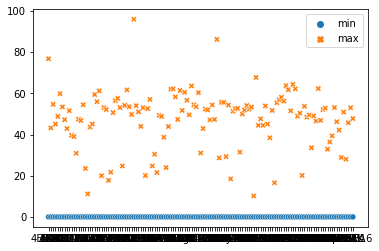

In [18]:
# maxes before standardization
minmax_before = df.drop("Condition",axis=1).apply(minMax)
sns.scatterplot(data=minmax_before[:].T)

### 1.0. Standardize data using z-score
$z = \frac{x - \mu}{\sigma}$

<AxesSubplot:>

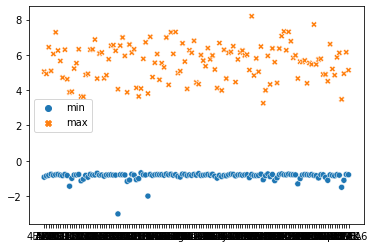

In [19]:
# standardize feature data
for col in df.drop("Condition",axis=1):
    df[col] = (df[col] - df[col].mean())/ df[col].std()

# maxes after standardization
minmax_after = df.drop("Condition",axis=1).apply(minMax)
sns.scatterplot(data=minmax_after[:].T)

### 1.0. Define data object for use in other sections

In [20]:
class ImmunologicalData:
    """
    Builds and manages separate data and target objects to 
    make dataset more user-friendly. Standardizes the data 
    using z-score and encodes class labels as integers.
    """
    
    def __init__(self, as_frame):
        '''
        Constructs instance of ImmunologicalData.
        '''
        self.data = None
        self.target = None
        self.feature_names = None
        self.frame = None
        
        if as_frame:
            df = pd.read_csv('data/HW2_Q1_DATA.csv')
            
            # standardize feature data
            for col in df.drop("Condition",axis=1):
                df[col] = (df[col] - df[col].mean())/ df[col].std() # z =(x- μ)/σ
            
            
            # hotcode categorical label
            def get_condition_num(condition):
                '''
                Encodes given condition as a predetermined integer.
                '''
                if condition == "CoV2":
                    return 1
                elif condition == "Kawasaki":
                    return 2
                elif condition == "MIS-C":
                    return 3
                else:
                    raise IllegalArgumentException("Condition not recognized.")
                    
            df["Condition_Num"]=df["Condition"].apply(get_condition_num) 

            
            # store as members of this object
            self.frame = df
            self.data = df.drop(["Condition", "Condition_Num"], axis=1)            
            self.target = df["Condition_Num"]           
            self.feature_names = list(df.columns) 
            
print('Test ImmunologicalData()')
idata = ImmunologicalData(as_frame=True)
X = idata.data
y = idata.target

print(X.shape)
print(y.shape)

Test ImmunologicalData()
(1000, 133)
(1000,)


# Part 1.1: Filter-based Feature Selection

## Part 1.1.1: Work
**TODO:**
- **Apply a filter-based feature selection method of your choice using 10-fold cross validation.**
- **Use the results to choose the top 20 features.**

**TIP: Scikit-learn provides implementations of many useful statistical measures.**

- **Pearson’s Correlation Coefficient: f_regression()**
- **ANOVA: f_classif()**
- **Chi-Squared: chi2()**
- **Mutual Information: mutual_info_classif() and mutual_info_regression()**

**Also, SciPy provides implementations of many more statistics, such as Kendall’s tau (kendalltau) and Spearman’s rank correlation (spearmanr).**


**TIP:** 
1. **Research and import desired feature selection methods [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection).**
2. **For k-fold cross validation, consider the [this](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) and/or [this](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate).**
3. **Research and import desired classification algorithms from [here](https://scikit-learn.org/stable/supervised_learning.html).**
4. **Research and import desired clustering algorithms from [here](https://scikit-learn.org/stable/modules/clustering.html).**

### 1.1.1. Score features using ANOVA with 10-fold cross validation
ANOVA assumes continuous values for data and categories for the target.

In [21]:
# define DataFrame to store results
df_anova_results = pd.DataFrame(columns=['k','Feature','F_score','P_value']).astype(dtype= {'k':'int64','Feature':'object', 'F_score':'float64','P_value':'float64'})


kf=KFold(n_splits=10, shuffle=False)  
for k, (train, test) in enumerate(kf.split(X, y)):

    # get training rows for this fold
    X_train = X.iloc[train] 
    y_train = y.iloc[train]
    
    # calculate f-scores and p-values for all 133 feature columns using ANOVA
    f_scores, p_values = f_classif(X_train,y_train)
     
    # add row of f-score and p-value to result DataFrame for each (Fold, Feature)
    for i, f_score in enumerate(f_scores):
        
        col_name = idata.feature_names[i]
        p_value = p_values[i]
        new_row = pd.Series([k+1,col_name,f_score,p_value], index = df_anova_results.columns)
        df_anova_results = df_anova_results.append(new_row, ignore_index=True)

In [22]:
df_anova_results.head()

,k,Feature,F_score,P_value
0,1,4E-BP1,3.289869,0.037709
1,1,ADA,6.060085,0.002431
2,1,AREG,0.400093,0.670377
3,1,AXIN1,0.565612,0.568215
4,1,BACH1,3.071017,0.046862


(133, 3)


<AxesSubplot:>

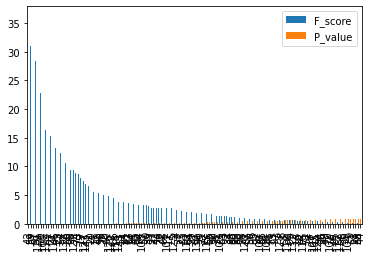

In [23]:
# calculate average f-score and p-value across all folds
df_anova_means=df_anova_results.drop("k",axis=1).groupby(["Feature"]).mean()
df_anova_means = df_anova_means.reset_index() # add feature to means DataFrame
print(df_anova_means.shape)

# visualize
df_anova_sorted=df_anova_means.sort_values(by="F_score", ascending=False)
df_anova_sorted.plot.bar()

### 1.1.1. Select top 20 features from ANOVA results

In [24]:
# select 20 features with largest F-scores
df_anova_sorted.head(20)

list_anova_top_20 = list(df_anova_sorted["Feature"].head(20))
print(*list_anova_top_20, sep=", ")

DCBLD2, HGF, IL-17A, FAM3B, STC1, ITGB6, OPG, SCF, EDAR, CLEC4C, SIT1, DPP10, CDCP1, FGF-21, uPA, CLEC4A, HEXIM1, NT-3, TNF, IL7


### 1.1.1. Score features using Pearson's correlation coefficient  with 10-fold cross validation

In [25]:
# define DataFrame to store results
df_pearson_results = pd.DataFrame(columns=['k','Regressor','F_score','P_value']).astype(dtype= {'k':'int64','Regressor':'object', 'F_score':'float64','P_value':'float64'})

# cross validation
kf=KFold(n_splits=10, shuffle=False)  
for k, (train, test) in enumerate(kf.split(X, y)):

    # get training rows for this fold
    X_train = X.iloc[train] 
    y_train = y.iloc[train]
    
    # calculate f-test for Pearson's correlation coefficient for this fold
    f_scores, p_values = f_regression(X_train, y_train, center=True)
      
    # add row to result DataFrame for each Fold,Feature,F-score
    for i, f_score in enumerate(f_scores):
        col_name = idata.feature_names[i]
        p_value = p_values[i]
        new_row = pd.Series([k+1,col_name,f_score,p_value], index = df_pearson_results.columns)
        df_pearson_results = df_pearson_results.append(new_row, ignore_index=True)
        

In [26]:
df_pearson_results.head()

,k,Regressor,F_score,P_value
0,1,4E-BP1,0.142749,0.705653
1,1,ADA,1.224572,0.268762
2,1,AREG,0.259387,0.610667
3,1,AXIN1,1.118628,0.290498
4,1,BACH1,3.997947,0.045857


### 1.1.1. Compute Average and Visualize results

<AxesSubplot:>

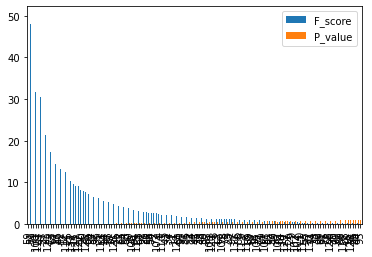

In [27]:
# compute average F_score and p_value across all training sets
# reset_index() to add Regressor column to DataFrame
df_pearson_means=df_pearson_results.drop("k",axis=1).groupby(["Regressor"]).mean().reset_index()
df_pearson_sorted=df_pearson_means.sort_values(by="F_score", ascending=False)
df_pearson_sorted.plot.bar()

### 1.1.1. Select top 20 features

In [28]:
# select 20 regressors with largest F-scores
df_pearson_top_20=df_pearson_sorted.head(20)

list_pearson_top_20 = list(df_pearson_top_20["Regressor"])
print(*list_pearson_top_20, sep=", ")

HGF, FAM3B, ITGB6, OPG, STC1, EDAR, CLEC4C, CDCP1, TNF, IL6, IL-17A, CD5, DPP10, DCBLD2, CCL25, SIT1, CLEC4A, uPA, CCL4, TREM1


### 1.1.1. Score features using Mutual Information with 10-fold cross validation

In [29]:
# define DataFrame to store results
df_mi_results = pd.DataFrame(columns=['k','Feature','Mutual Information']).astype(dtype= {'k':'int64','Feature':'object', 'Mutual Information':'float64'})

kf=KFold(n_splits=10, shuffle=False)  
for k, (train, test) in enumerate(kf.split(X, y)):

    # get training rows for this fold
    X_train = X.iloc[train] 
    y_train = y.iloc[train]
    
    # calculate f-scores and p-values for all 133 feature columns using ANOVA
    mi = mutual_info_classif(X_train,y_train)
        
    # add row of mutual information to result DataFrame for each (Fold, Feature)
    for i, mutual_info_score in enumerate(mi):
        
        col_name = idata.feature_names[i]
        p_value = p_values[i]
        new_row = pd.Series([k+1,col_name,mutual_info_score], index = df_mi_results.columns)
        df_mi_results = df_mi_results.append(new_row, ignore_index=True)


In [30]:
df_mi_results.head()

,k,Feature,Mutual Information
0,1,4E-BP1,0.023810
1,1,ADA,0.080616
2,1,AREG,0.000000
3,1,AXIN1,0.000000
4,1,BACH1,0.019781


(133, 2)


<AxesSubplot:>

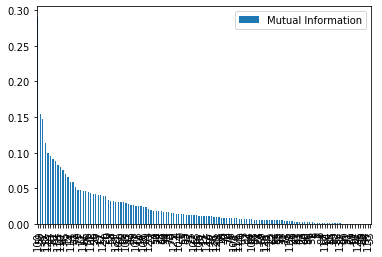

In [31]:
# calculate average f-score and p-value across all folds
df_mi_means=df_mi_results.drop("k",axis=1).groupby(["Feature"]).mean()
df_mi_means = df_mi_means.reset_index() # add feature to means DataFrame
print(df_mi_means.shape)

# visualize
df_mi_sorted=df_mi_means.sort_values(by="Mutual Information", ascending=False)
df_mi_sorted.plot.bar()

In [32]:
# select 20 features with largest Mutual Information scores
df_mi_sorted.head(20)

list_mi_top_20 = list(df_mi_sorted["Feature"].head(20))
print(*list_mi_top_20, sep=", ")

OPG, HGF, CSF-1, uPA, TNFRSF9, CXCL10, FAM3B, IL-17A, STC1, PTH1R, EDAR, DNER, CD5, SIT1, ADA, DCBLD2, ITGB6, CCL23, SH2D1A, MMP-1


# Part 1.1.1: Answer

**List the top 20 features you found:**

*Features using Mutual Information: OPG, HGF, CSF-1, uPA, TNFRSF9, FAM3B, CXCL10, IL-17A, STC1, PTH1R, SIT1, DNER, EDAR, CD5, ADA, DCBLD2, ITGB6, CCL23, MMP-1, CLEC4C* 

# Part 1.1.2: Work
**TODO:**
- **Create and plot a 20 x 20 correlation heat map using your features from part 1.1.1**

**TIPS:** 
1. **Pandas has a correlation functionality for dataframes ([Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)).**
2. **Seaborn has a heatmap functionality ([Link](https://seaborn.pydata.org/generated/seaborn.heatmap.html)).**

### 1.1.2. Heatmap from Mutual Information Results

<AxesSubplot:>

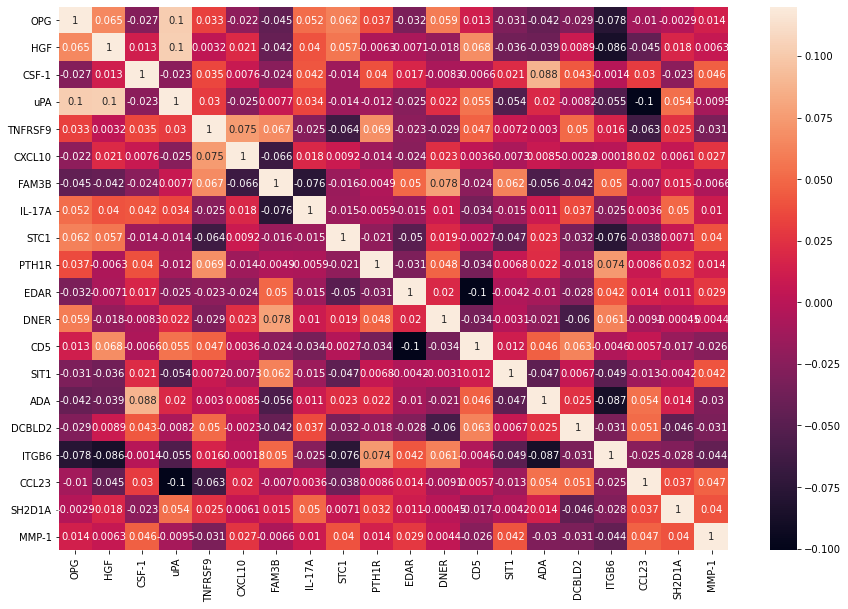

In [33]:
# select top 20 features
df_mi_top_20_features=X.loc[:][list_mi_top_20]

# heatmap
plt.figure(figsize=(15,10))
mi_top_20_cor=df_mi_top_20_features.corr(method='pearson')
sns.heatmap(mi_top_20_cor,annot=True,vmax=0.12)

### 1.1.2. Define method to calculate average heatmap value

In [34]:
def calc_heatmap_average(df, include_diagonal):
    '''
    Calculate average value of heatmap.
    
    Args:
        df: DataFrame used to generate heatmap
        include_diagonal: True if average should include 
                          heatmap diagonals, False otherwise
    '''
    arr = df.to_numpy()
    size = df.shape[0]
    
    total=0
    num_entries=0
    
    # sum all cells
    for i in range(0,size):
        for j in range (0,size):
            if i == j and include_diagonal:
                total += arr[i][j]
                num_entries = num_entries + 1
            elif i != j:
                total += arr[i][j]
                num_entries = num_entries + 1
    
    return total / num_entries

In [35]:
print("Mutual Information averages")
print(calc_heatmap_average(mi_top_20_cor,True))

Mutual Information averages
0.05170936053607664


# Part 1.1.2: Answer

**Plot the heatmap in one of the above cells or embed it as an image in this cell**

**What is the average of the values in the heatmap?** *For the Mutual Information heatmap, average was 0.04995 (diagonal included).*

# Part 1.1.3: Work
**TODO:**
- **Train a classifier using your (top 1, top 2, ..., top 20) features from part 1.1.1**
- **Plot the 10-fold cross-validated accuracy as a function of the number of features.**

**TIPS:** 
1. **scikit-learn has a great collection of classifiers ([Link](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)).**
2. **scikit-learn also supports different ways of cross-validation([Link](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators)).**

### 1.1.3. Define SVM classifier

In [36]:
def train_svm_classifier(X,y,k):
    '''
    Trains SVM model using pipeline. Scales data and performs k-fold cross validation.
    
    Args:
        X: feature data
        y: labels
        k: number of folds for cross validation
    
    Returns:
        Average score across training folds.
    '''
    
    # get splits
    kfold = KFold(n_splits=k, shuffle=False)
    
    # define SVM model
    classifier = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    
    # perform cross-validation
    scores = cross_val_score(classifier, X, y, scoring='accuracy', cv=kfold, n_jobs=-1)

    # return the average
    return np.average(scores)


### 1.1.3. Train classifier using subsets of top 20 features of Mutual Information and 10-fold cross validation

In [37]:
%%time

# list to store results
top_20_svm_results = list()

# select 1 to 20 features from top 20
for i in range(1,21):
    
    # create dataframe with only those features
    subset=list_mi_top_20[:i]
    X_subset=idata.data.loc[:][subset]
    
    # get average score from cross validation
    avg = train_svm_classifier(X_subset, y, k=10)

    # store result
    top_20_svm_results.append([i,avg])

CPU times: user 768 ms, sys: 123 ms, total: 892 ms
Wall time: 4.28 s


### 1.1.3. Visualize training results

<AxesSubplot:xlabel='number_of_features', ylabel='accuracy'>

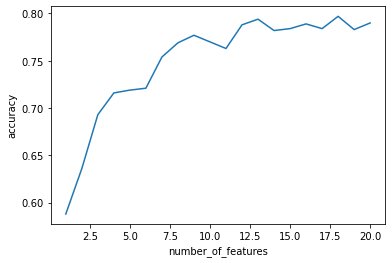

In [38]:
df_top_20_svm_results = pd.DataFrame(data=top_20_svm_results, columns=['number_of_features','accuracy'])

sns.lineplot(data=df_top_20_svm_results, x="number_of_features", y="accuracy")

# Part 1.1.3: Answer

**Include the plot as the output of one of the above cells or embed it as an image in this cell**

# Part 1.1.4: Work
**TODO:**
- **Devise a method for determining a threshold that can be used to separate truly relevant features from those that are spurious.**
- **Apply this method to the data to obtain a new set of features.**
- **Re-train a classifier with the new features using 10-fold cross validation.**

### 1.1.4. Define Permutation Method to randomize labels

In [39]:
def rearrange_labels(df,label_col):
    '''
    Randomizes the labels for each row in a given label 
    column for a given DataFrame.
    
    Args:
        df: DataFrame of data
        label_col: column to randomize
    
    Returns:
        DataFrame of the randomized column
    '''
    # name for rearranged column to make it easier to append to the original dataframe
    col_name = label_col + "_Rearranged"
    
    # selecting only the label column build new DataFrame with labels randomly rearranged
    df_label_only = pd.DataFrame(df[label_col]).sample(frac=1).rename(columns={label_col: col_name})
    
    # update index to reflect reordering to prevent use of original ordering when concatenating with original DataFrame
    df_label_only.reset_index(inplace=True, drop=True)  
    
    # count of the quantity of each label to ensure same quantity appears after rearrangement
    dict_before = dict(df[label_col].value_counts())
    dict_after = dict(df_label_only[col_name].value_counts())
    if dict_before != dict_after:
        raise ValueError("Label counts do not match before and after rearrangement.", dict_before, dict_after)
        
    return df_label_only

print('Test rearrange_labels()')
df_rearrange_test = pd.read_csv("data/HW2_Q1_Data_sample.csv")
print(df_rearrange_test["Condition"].value_counts(),"\n")
df_rearrange_testresult = pd.concat([df_rearrange_test, rearrange_labels(df_rearrange_test, "Condition")],axis=1)
print(df_rearrange_testresult["Condition_Rearranged"].value_counts(),"\n")
df_rearrange_testresult.loc[:][["Condition", "Condition_Rearranged"]].head(20)


Test rearrange_labels()
CoV2        10
MIS-C        5
Kawasaki     4
Name: Condition, dtype: int64 

CoV2        10
MIS-C        5
Kawasaki     4
Name: Condition_Rearranged, dtype: int64 



,Condition,Condition_Rearranged
0,CoV2,CoV2
1,CoV2,MIS-C
2,CoV2,CoV2
3,Kawasaki,CoV2
4,MIS-C,Kawasaki
5,CoV2,CoV2
6,CoV2,MIS-C
7,Kawasaki,Kawasaki
8,CoV2,CoV2
9,MIS-C,Kawasaki


### 1.1.4. Define Mutual Information method for repeated iterations

In [ ]:
def run_mutual_information(X,y,k):
    '''
    Runs mutual information for given data 
    and target using k-fold cross validation.
    
    Args:
        X: feature data
        y: labels
        k: number of folds for cross validation
    
    Returns:
        DataFrame of f-scores and p-values.
    '''

    # define DataFrame to store results
    df_results = pd.DataFrame(columns=['k','Feature','Mutual Information']).astype(dtype= {'k':'int64','Feature':'object', 'Mutual Information':'float64'})

    kf=KFold(n_splits=k, shuffle=False)  
    for k, (train, test) in enumerate(kf.split(X, y)):

        # get training rows for this fold
        X_train = X.iloc[train] 
        y_train = y.iloc[train]

        # calculate f-scores and p-values for all 133 feature columns using ANOVA
        mi = mutual_info_classif(X_train,y_train)

        # add row of mutual information to result DataFrame for each (Fold, Feature)
        for i, mutual_info_score in enumerate(mi):

            col_name = idata.feature_names[i]
            p_value = p_values[i]
            new_row = pd.Series([k+1,col_name,mutual_info_score], index = df_results.columns)
            df_results = df_results.append(new_row, ignore_index=True) 
            
    # calculate average f-score and p-value across all folds
    df_means = df_results.drop("k",axis=1).groupby(["Feature"]).mean()
    df_means = df_means.reset_index() # add feature to means DataFrame
    return df_means


### 1.1.4. Run Mutual Information for each of p label permutations

In [40]:
# prepare data
df_original_labels = pd.DataFrame(idata.target)

In [ ]:
%%time
# 18 min

# create DataFrame to hold all results
df_permutation_results = pd.DataFrame(columns=['Feature','Mutual Information','Permutation', ]).astype(dtype= {'Feature':'object', 'Mutual Information':'float64','Permutation':'int64'})

num_permutations = 100
for p in range(0,num_permutations):
    
    # randomize labels and run mutual information for this permutation
    s_randomized_labels = rearrange_labels(df_original_labels, "Condition_Num")["Condition_Num_Rearranged"]  
    df_perm = run_mutual_information(X,s_randomized_labels,10)
    
    # label all rows in this permutation with permutation number
    df_perm["Permutation"]=p+1
    
    # append rows to permutation results
    df_permutation_results = df_permutation_results.append(df_perm, ignore_index=True) 


In [ ]:
print(df_permutation_results.shape)
df_permutation_results.head()

### 1.1.4. Study how to estimate p-value using permutation histogram

In [ ]:
def estimate_p_value(feature, feature_mi, perms, num_permutations):
    '''
    Calculates an estimated p-value of a given mutual information 
    value for a given feature using histogram of permutations.
    
    Args:
        feature: Feature to use for calculations
        feature_mi: Feature for mutation information
        perms: DataFrame of permutations
        num_permutations: The total number of permutations
        
    Returns:
        Estimate of the p-value.
    '''

    # calculate the number of mutual information values generated by random permutation which exceed the correct mi
    num_greater = perms[(perms["Feature"] == feature) & (perms["Mutual Information"] > feature_mi)].shape[0]

    return num_greater/num_permutations

In [ ]:
# histogram of 4E-BP1
hist = df_permutation_results[df_permutation_results["Feature"] == '4E-BP1'].drop("Permutation",axis=1).hist(bins=10)

In [ ]:
test_mi = df_mi_means[df_mi_means["Feature"] == "4E-BP1"].iloc[0]["Mutual Information"]
test_mi

In [ ]:
estimate_p_value("4E-BP1", test_mi,df_permutation_results,num_permutations)

### 1.1.4. Estimate p-value for each Mutual Information score from 1.1.1 using permutations

In [ ]:
# apply estimate function to a copy of the mutual information dataframe
df_2 = df_mi_means.copy()
df_2["P_value"]=df_2.apply(lambda x : estimate_p_value(x["Feature"],x["Mutual Information"],df_permutation_results,num_permutations), axis=1)


In [ ]:
df_2.head()

### 1.1.4. Remove any features with p > 0.05 based on Mutual Information

In [ ]:
df_relevant_features_only = df_2[df_2["P_value"]  < 0.05]
df_relevant_features_only.shape

In [ ]:
list_mi_top_threshold_features = list(df_relevant_features_only["Feature"])
print(*list_mi_top_threshold_features, sep=", ")

### 1.1.4. Train SVM classifier using relevant features and 10-fold cross validation

In [ ]:
# create dataframe with top 20 features
X_relevant=idata.data.loc[:][list_mi_top_threshold_features]
print(X_relevant.shape)

# # get average score from cross validation
train_svm_classifier(X_relevant, y, k=10)

# Part 1.1.4: Answer

**Briefly describe the method you devised for determinining a threshold for truly relevant features:**

#### How
*Create 100 permutations of the labels for the dataset. For each permutation, shuffle the labels but leave the remainder of the data intact. The number of each label before shuffling should match the number after shuffling. Calculate mutual information (MI) for all features for each permutation and store the results. (For each feature, you will have 100 mutual information scores).*

*For the mutual information score calculated for each feature in the original dataset (with correct labels), estimate the p-value of this score by using a histogram of the permutation results. The calculation of the p-value is as follows:*

- *Determine the number $r$ of permutation results which have a MI value greater than or equal to the original MI value.*
- *Divide $r$ by the total number of permutation results $R$ (i.e. 100, in this case). The resulting percent is the p-value.*

*Remove all features from the dataset for which the mutual information score has statistical significance p > 0.05. This is my threshold. Any removed features are considered to have spurious correlation. Any remaining features are considered truly relevant.*

#### Why
*Shuffling the labels erased the correlation between the features and the correct labels. Any correlation found between labels in a dataset with random labels therefore represents the noise inherent to the method for calculating mutual information for a dataset of this size. The estimated p-value of my threshold method represents the probability that a correlation of the magnitude found for the original MI value occurred by chance. If I find that there is less than a 5% chance that a correlation of this magnitude was achieved by chance, I conclude that the feature is relevant.*



**List the new set of features obtained from applying your method to the data:**

*4E-BP1, ADA, CCL23, CCL25, CCL3, CD5, CD6, CLEC4A, CLEC4C, CSF-1, CXCL10, DCBLD2, DCTN1, DNER, DPP10, EDAR, EIF5A, FAM3B, HGF, HNMT, IL-12B, IL-17A, IL-17C, ITGB6, KLRD1, MMP-1, MMP-10, NCR1, OPG, OSM, PD-L1, PTH1R, SCF, SH2D1A, SIT1, STC1, TNF, TNFRSF9, TREM1, uPA*

**What was the 10-fold cross-validated accuracy of the classifier trained with these new features?** *0.719*

# Part 1.1.5: Work
**TODO:** 
- **Use a clustering algorithm of your choice to cluster the features you found in part 1.1.4 into 10 clusters.**
- **Choose a representative feature from each cluster and train a classifier with these features using 10-fold cross validation.**

### 1.1.5. Cluster variables using Kmeans

In [ ]:
# transpose data to cluster by feature
df_features=X.loc[:][list_mi_top_threshold_features].T

# kmeans clustering with k=10
kmeans = KMeans(n_clusters=10).fit(df_features)
labels = kmeans.labels_

# add features as index
s_labels = pd.Series(labels)
s_labels.index = X.loc[:][list_mi_top_threshold_features].columns
s_labels

### 1.1.5. Select representative feature from each cluster

In [ ]:
# select an arbitrary feature from the options in a single cluster
s_labels.sort_values(ascending=False, inplace=True)
s_representative_features = s_labels.drop_duplicates()
print(s_representative_features)
print()

representative_features = list(s_representative_features.index)
print(*representatitive_features, sep=", ")

### 1.1.5. Train SVM classifier with representative features using 10-fold cross validation

In [ ]:
# get data
X = idata.data.loc[:][representative_features]
y=idata.target
print(X.shape)

# get average score from cross validation
train_svm_classifier(X, y, k=10)

# Part 1.1.5: Answer

**List the representative features you chose from the 10 clusters:**

*KLRD1, CLEC4C, PTH1R, DCTN1, FGF-21, FAM3B, TREM1, SH2D1A, CSF-1, DPP10*

**What was the 10-fold cross-validated accuracy of the classifier trained with these representative features?** *0.532*

# Part 1.2: Wrapper-based Feature Selection

# Part 1.2.1: Work
**TODO:**
- **Apply a wrapper-based feature selection method of your choice to the data.**

**TIPS:**
1. **Scikit learn has an implementation of [recursive feature elimination](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html) (RFE).**
2. **The mlxtend library has very thorough documentation and great options for [sequential](http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/) and [exhaustive](http://rasbt.github.io/mlxtend/user_guide/feature_selection/ExhaustiveFeatureSelector/) feature selection.**
        
        

### 1.2.1. Data

In [ ]:
X = idata.data
y = idata.target
print(X.shape, y.shape)

### 1.2.1. Test with RFE wrapper model
Based on reference material from [here](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py).

In [ ]:
%%time 
# 20 min runtime


svc = SVC(kernel="linear")
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(10),
              scoring='accuracy')
rfecv.fit(X, y)

In [ ]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### 1.2.1. Perform feature selection with RFE using 10-fold cross validation

In [ ]:
def train_wrapper_model(X,y):
    '''
    Trains wrapper-based model using RFE.
    
    Args:
        X: feature data
        y: labels
    
    Returns:
        Trained model.
    '''
    svc = SVC(kernel="linear")
    rfe = RFE(estimator=svc, step=1)
    selector = rfe.fit(X,y)
    return selector

In [ ]:
def add_wrapper_results_row(df, k, support):
    '''
    Appends column to results DataFrame.
    
    Args:
        df: DataFrame
        k: Fold number, indexed starting with zero
        support: np.ndarray corresponding to features 
                 in the data. Array element is True if 
                 feature is selected, False otherwise.
    Returns:
        None
    '''
    
    # define name for this fold's column
    col_name = "Support_Fold_" + str(k+1)
     
    # build DataFrame of this fold's results
    new_support = pd.DataFrame(support, columns=["Support_Bool"])
    new_support["Support"]=new_support["Support_Bool"].astype(int) # convert boolean to int

    # add this fold's support to the growing DataFrame
    df[col_name]=new_support["Support"]

In [ ]:
%%time
#14 min runtime

# build DataFrame to capture all fold results
df_wrapper_results = pd.DataFrame(data=idata.data.columns, columns=["Feature"])


kf=StratifiedKFold(10)  
for k, (train, test) in enumerate(kf.split(X, y)):

    # get training rows for this fold
    X_train = X.iloc[train] 
    y_train = y.iloc[train]
    print(X_train.shape, y_train.shape)

    # perform selection
    selector = train_wrapper_model(X_train,y_train)
    
    # add column to results
    add_wrapper_results_row(df_wrapper_results,k,selector.support_)  

### 1.2.1. Determine how many folds each feature is in

In [ ]:
# sum the number of times feature is selected for all folds and store result in a Summary column
df_wrapper_results["Summary"]=df_wrapper_results.drop("Feature",axis=1).sum(axis=1)
df_wrapper_results.head()

In [ ]:
# select only features that are present in 8 or more folds (out of 10)
df_8_or_more = df_wrapper_results[df_wrapper_results["Summary"]>7][["Feature","Summary"]]
df_8_or_more

In [ ]:
# get a list
list_top_rfe_features=list(df_8_or_more["Feature"])
print(len(list_top_rfe_features))
print(*list_top_rfe_features, sep=", ")

# Part 1.2.1: Answer

**List the top features selected in at least 8 out of 10 folds:**

*BIRC2, CCL23, CCL25, CCL28, CCL3, CD6, CDCP1, CLEC4A, CLEC4C, CXCL10, CXCL9, DCBLD2, DCTN1, DPP10, EDAR, EIF4G1, FAM3B, FGF-19, FGF-21, HGF, IL-12B, IL-17A, IL6, IL7, IL8, ITGB6, LY75, MCP-1, MMP-10, NT-3, OPG, OSM, PD-L1, SCF, SIT1, STC1, TNF, TNFRSF9, TRANCE, TREM1, TRIM21, TWEAK, uPA, VEGFA*

# Part 1.2.2: Work
**TODO:**
- **Create and plot a correlation heat map using your features from part 1.2.1.**

**TIPS:**
1. **Pandas has a [correlation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) functionality for dataframes.**
2. **Seaborn has a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) functionality.**
        

### 1.2.2. Heatmap

In [ ]:
# select only those features from the data
df_rfe_top_features = X.loc[:][list_top_rfe_features]

# heatmap
plt.figure(figsize=(10,5))
top_rfe_cor=df_rfe_top_features.corr(method='pearson')
sns.heatmap(top_rfe_cor,vmax=0.1)

### 1.2.2. Calculate Average Value of Heatmap

In [ ]:
# calculate average value of heatmap
print("RFE heatmap averages")
print(calc_heatmap_average(top_rfe_cor,True))

# Part 1.2.2: Answer

**Plot the heatmap in one of the above cells or embed it as an image in this cell**

**What is the average of the values in the heatmap?** *The average is 0.0217 (diagonals included)*.

# Part 1.2.3: Work
**TODO:**
- **Train a classifier using your features from part 1.2.1 with 10-fold cross validation.**

**TIPS:**
1. **scikit-learn has a great collection of [classifiers](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html).**
2. **scikit-learn also supports different ways of [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators).** 

### 1.2.3. Train SVM classifier using rfe features and 10-fold cross validation

In [ ]:
# create dataframe with only those features
X_rfe_svm = X.loc[:][list_top_rfe_features]
print(X_rfe_svm.shape)

# get average score from cross validation
train_svm_classifier(X_rfe_svm, y, k=10)

# Part 1.2.3: Answer

**What was the 10-fold cross-validated accuracy of the classifier trained with these features?** *0.737*

# Part 1.3: Embedded Feature Selection

# Part 1.3.1: Work
**TODO:**
- **Apply an embedded feature selection method of your choice using 10-fold cross validation.**

**TIPS:**
1. **See [this link](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree) and/or [this link](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) for tree based methods.**
2. **Check out the [SelectFromModel](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html) functionality too.**

### 1.3.1. Perform feature selection with RandomForestClassifier using 10-fold cross validation
Based on reference material from [here](https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f).

In [ ]:
def train_embedded_model(X,y):
    '''
    Trains a model using an embedded method.
    
    Args:
        X: feature data
        y: labels
    
    Returns:
        Trained model.
    '''
    sel = SelectFromModel(RandomForestClassifier())
    return sel.fit(X, y)

In [ ]:
def add_embedded_results_row(df, k, support):
    '''
    Appends column to results DataFrame.
    
    Args:
        df: DataFrame
        k: Fold number, indexed starting with zero
        support: np.ndarray corresponding to features 
                 in the data. Array element is True if 
                 feature is selected, False otherwise.
    Returns:
        None
    '''
    
    # define name for this fold's column
    col_name = "Support_Fold_" + str(k+1)
     
    # build DataFrame of this fold's results
    new_support = pd.DataFrame(support, columns=["Support_Bool"])
    new_support["Support"]=new_support["Support_Bool"].astype(int) # convert boolean to int

    # add this fold's support to the growing DataFrame
    df[col_name]=new_support["Support"]

In [ ]:
%%time 

# build DataFrame to capture all fold results
df_embedded_results = pd.DataFrame(data=idata.data.columns, columns=["Feature"])

kf=StratifiedKFold(10)  
for k, (train, test) in enumerate(kf.split(X, y)):

    # get training rows for this fold
    X_train = X.iloc[train] 
    y_train = y.iloc[train]

    # perform selection
    selector = train_embedded_model(X_train,y_train)
    
    # add column to results
    add_embedded_results_row(df_embedded_results,k,selector.get_support()) 

### 1.3.1. Determine how many folds each feature is in

In [ ]:
df_embedded_results.head()

In [ ]:
# sum the number of times feature is selected for all folds and store result in a Summary column
df_embedded_results["Summary"]=df_embedded_results.drop("Feature",axis=1).sum(axis=1)
df_embedded_results.head()

In [ ]:
# select only features that are present in 8 or more folds (out of 10)
df_8_or_more_embedded = df_embedded_results[df_embedded_results["Summary"]>7][["Feature","Summary"]]
df_8_or_more_embedded

In [ ]:
# get a list
list_top_embedded_features=list(df_8_or_more_embedded["Feature"])
print(len(list_top_embedded_features))
print(*list_top_embedded_features, sep=", ")

# Part 1.3.1: Answer

**List the top features selected in at least 8 out of 10 folds:**

*ADA, CCL23, CD5, CLEC4A, CSF-1, CXCL10, DCBLD2, DNER, DPP10, EDAR, FAM3B, HGF, IL-17A, ITGB6, MMP-10, OPG, PTH1R, SCF, SIT1, STC1, TNFRSF9, uPA*

# Part 1.3.2: Work
**TODO:**
- **Create and plot a 20 x 20 correlation heat map using your features from part 1.3.1.**

**TIPS:**
1. **Pandas has a [correlation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) functionality for dataframes.**
2. **Seaborn has a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) functionality.**

### 1.3.2. Heatmap

In [ ]:
# select only those features from the data
df_embedded_top_features = X.loc[:][list_top_embedded_features]

# heatmap
plt.figure(figsize=(10,5))
top_embedded_cor=df_embedded_top_features.corr(method='pearson')
sns.heatmap(top_embedded_cor,vmax=0.1)

### 1.3.2. Calculate Heatmap Average

In [ ]:
# calculate average value of heatmap
print("Embedded heatmap averages")
print(calc_heatmap_average(top_embedded_cor,True))

# Part 1.3.2: Answer

**Plot the heatmap in one of the above cells or embed it as an image in this cell**

**What is the average of the values in the heatmap?** *Average is 0.0465 (diagonal included).*

## Part 1.3.3: Work

In [ ]:
# TODO: Train a classifier using your features from part 1.3.1 with 10-fold cross validation

# TIP: 1. scikit-learn has a great collection of classifiers: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
#      2. scikit-learn also supports different ways of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators

In [ ]:
# create dataframe with only those features
X_embedded_svm = X.loc[:][list_top_embedded_features]
print(X_embedded_svm.shape)

# get average score from cross validation
train_svm_classifier(X_embedded_svm, y, k=10)

## Part 1.3.3: Answer

What was the 10-fold cross-validated accuracy of the classifier trained with these features? **0.797**